<h1><strong>Assignment 1 Part B</strong></h1>

In [ ]:
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

<h2><strong>1. Introduction</strong></h2>
<p>The goal of this study is to use a logistics regression model to categorise images of several clothing items. In doing so, we apply a logistics regression model on the Fashion-MNIST dataset which contains images of clothing from 10 different classes. We also analyse the accuracy of the logistic regression model in performing this image classification task by generating a confusion matrix based on the model’s prediction. This will allow analysing correspondence between the model’s classification result and a reference image. The study may also explore ways to improve the accuracy of prediction. For Instance, each image that is utilised by the model comes in a scale of 28x28 pixels by default and using images of higher resolution may increase the accuracy of the model by training it with more information.</p>

<h2><strong>2. Describe the Data</strong></h2>
<p>This Fashion-MNIST data set comprises 70,000 observations. Each observation is of a 28x28 grey-scale image of several clothing items. There are ten classes that each observation can be labelled as. These labels are: t-shirt, trouser, pullover, dress, coat, sandal, shirt, sneaker, bag, and ankle boot.</p>

<h2><strong>3. Why Logistic Regression?</strong></h2>
<p>The Fashion-MNIST data set is often used to benchmark machine learning algorithms by controlling the dataset [1]. Therefore, by testing the logistic regression model against the Fashion-MNIST dataset in our study, this allows us to determine the capability of the model for this particular image classification task compared to other machine learning algorithms. The logistic regression model we use to perform this image classification task is a supervised machine learning model that works by analysing relationships between one or more independent variables from a dataset. In this image classification application we expect that the model will be able to classify images into their classes by taking the image pixel information as a vector and computing a probability of the image belonging to each class [2].</p>

<h2><strong>4. Retrieving Data</strong></h2>

In [ ]:
image = fetch_openml('Fashion-MNIST', version = 1)

In [ ]:
image.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
image.target[:5]

0    9
1    0
2    0
3    3
4    0
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

<h2><strong>5. Exploring Data</strong></h2>

<h3>5.1. Show image & data</h3>

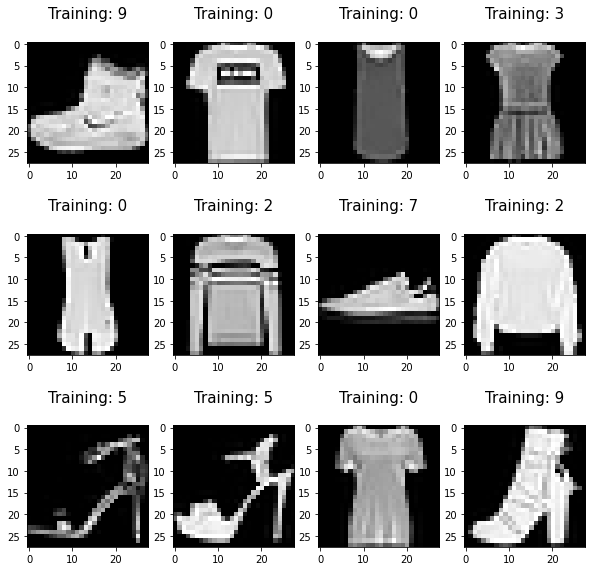

In [ ]:
plt.figure(figsize=(10,10))
for idx in range(12):
  images = image.data.iloc[idx,:]
  label = image.target[idx]
  plt.subplot(3, 4, idx + 1)
  plt.imshow(np.array(images).reshape(28, 28), cmap=plt.cm.gray)
  plt.title('Training: %i\n' % int(label), fontsize = 15)

In [ ]:
image.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,119.0,114.0,130.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,96.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h3>5.2. Show corresponding matrix</h3>

In [ ]:
np.array(image.data.iloc[9,:]).reshape(28, 28)

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        164.,  50.,   0.,   7.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          1.,   0.,   0.,   1.,   1.,   0.,   0.,   5.,   0.,  45., 217.,
        255., 176.,   0.,   6.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,
          0.,   3.,   3.,   5.,   9.,   0.,   2.,   0.,  62., 236., 231.,
        215.,  27.,   0.,   1.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

<h3>5.3. Understand the data</h3>
<p>The labelling of each observation is determined by the values of each individual pixel. Each of the 784 pixels is given a value ranging from 0 to 255. A value of 0 represents black, a value of 255 represents white, and every value in between is a shade of grey. The amount of these pixels and how they are grouped determines how each observation is labelled. For example, an observation with more black pixels, those of which are grouped closer to the bottom, is more likely to be a sneaker than a dress or shirt. It should be noted that each observation is not to the same scale so this explanation does not hold true. It is simply intended to aid the understanding of the classification process.</p>

<h2><strong>6. Build a Logistic Regression Model</strong></h2>

<h3>6.1. Load packages</h3>


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

<h3>6.2. Select target variable</h3>

In [ ]:
y = image.target
y[0]

'9'

<h3>6.3. Prepare data</h3>

In [ ]:
n_samples = len(image.data)
n_samples

70000

In [ ]:
X = image.data
X.shape

(70000, 784)

<h3>6.4. Split data into training and validation set</h3>
<p> The data is split into a training data set and a testing data set in order to understand the performance of the model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8,random_state=0)

<h3>6.5. Select a linear regression classifier</h3>

In [ ]:
lr = LogisticRegression(solver = 'lbfgs', max_iter = 100)

<h3>6.6. Fit the data</h3>
<p>The model is fitted on the training data using the fit() function.

In [ ]:
# Fit model on the training data
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

<h3>6.7. Prediction of unseen data</h3>
<p>Use the predict() function to perform a prediction on the testing data set.</p>

In [ ]:
# Make a prediction on the testing data
y_pred = lr.predict(X_test)
y_pred

array(['9', '5', '6', ..., '6', '1', '8'], dtype=object)

<h2><strong>7. Analysis of results - classification report</strong></h2>

In [ ]:
score = lr.score(X_test, y_test)
print(score)

0.8492857142857143


<h3>7.1. Create confustion matrix</h3>
<p>We use a confusion matrix to assess the model's performance. The confusion matrix comes in the form of a table with each row and column representing each label. The corresponding values indicate the number or correct and incorrect predictions.</p>

In [ ]:
confusion_matrix(y_test, y_pred)

array([[1156,    8,   28,   77,    4,    1,  102,    2,   12,    1],
       [   5, 1361,    9,   36,    9,    0,    2,    0,    2,    0],
       [  17,    5, 1034,   14,  183,    2,  100,    0,   10,    1],
       [  55,   21,   16, 1245,   73,    1,   37,    2,    5,    0],
       [   1,    0,  109,   38, 1128,    0,  107,    0,    5,    0],
       [   2,    1,    0,    0,    0, 1266,    0,   73,   14,   41],
       [ 217,    5,  170,   42,  162,    0,  853,    1,   23,    0],
       [   0,    0,    0,    0,    0,   40,    0, 1249,    4,   61],
       [   4,    0,   11,    8,    4,   11,   17,   13, 1273,    0],
       [   1,    0,    0,    0,    0,   21,    0,   58,    6, 1325]])

<h3>7.2. Visualise correct prediction</h3>

In [ ]:
images_and_predictions = list(zip(image.data, lr.predict(X)))

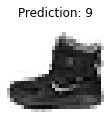

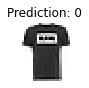

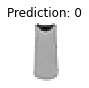

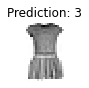

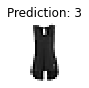

In [ ]:
plt.figure(figsize=(10,2))
for idx in range(5):
  images = image.data.iloc[idx,:]
  prediction = lr.predict(X)[idx]
  plt.subplot(1,5,idx+1)
  plt.axis("off")
  plt.imshow(np.array(images).reshape(28, 28), cmap=plt.cm.gray_r,interpolation='nearest')
  plt.title('Prediction: %i' % int(prediction))
  plt.show()

<h3>7.3. Visualise misclassified images</h3>

In [ ]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, y_pred):
  if label != predict:
    misclassifiedIndexes.append(index)
  index +=1

misclassifiedIndexes[:5]

[4, 14, 16, 34, 40]

In [ ]:
y_pred[4]

'6'

In [ ]:
np.array(y_test)[:5]

array(['9', '5', '6', '6', '2'], dtype=object)

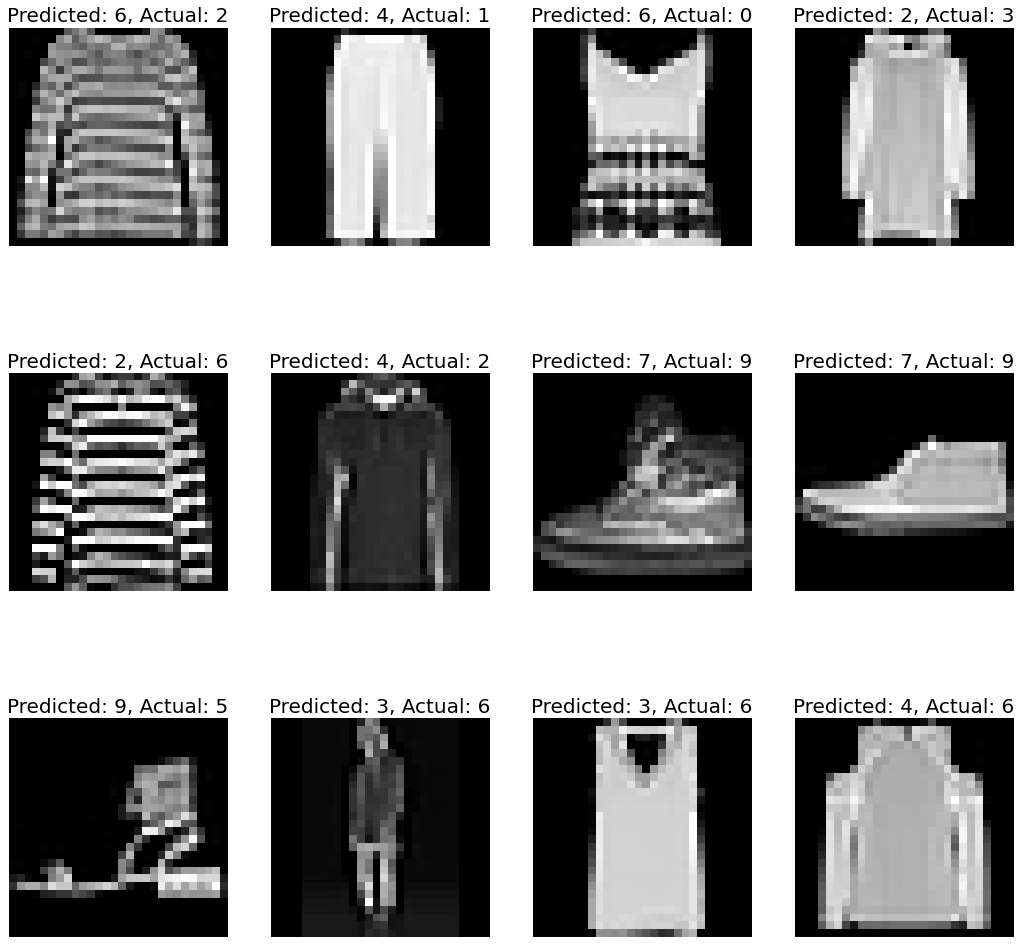

In [ ]:
plt.figure(figsize=(18,18))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:12]):
  plt.subplot(3, 4, plotIndex + 1)
  plt.axis("off")
  plt.imshow(np.array(X_test.iloc[badIndex, :]).reshape(28, 28), cmap=plt.cm.gray, interpolation='nearest')
  plt.title('Predicted: {}, Actual: {}'.format(y_pred[badIndex], np.array(y_test)[badIndex]), fontsize = 20)

<h3>7.4. Visualise correct images</h3>

In [ ]:
index = 0
classifiedIndexes = []
for label, predict in zip(y_test, y_pred):
  if label == predict:
    classifiedIndexes.append(index)
  index +=1

classifiedIndexes[:5]

[0, 1, 2, 3, 5]

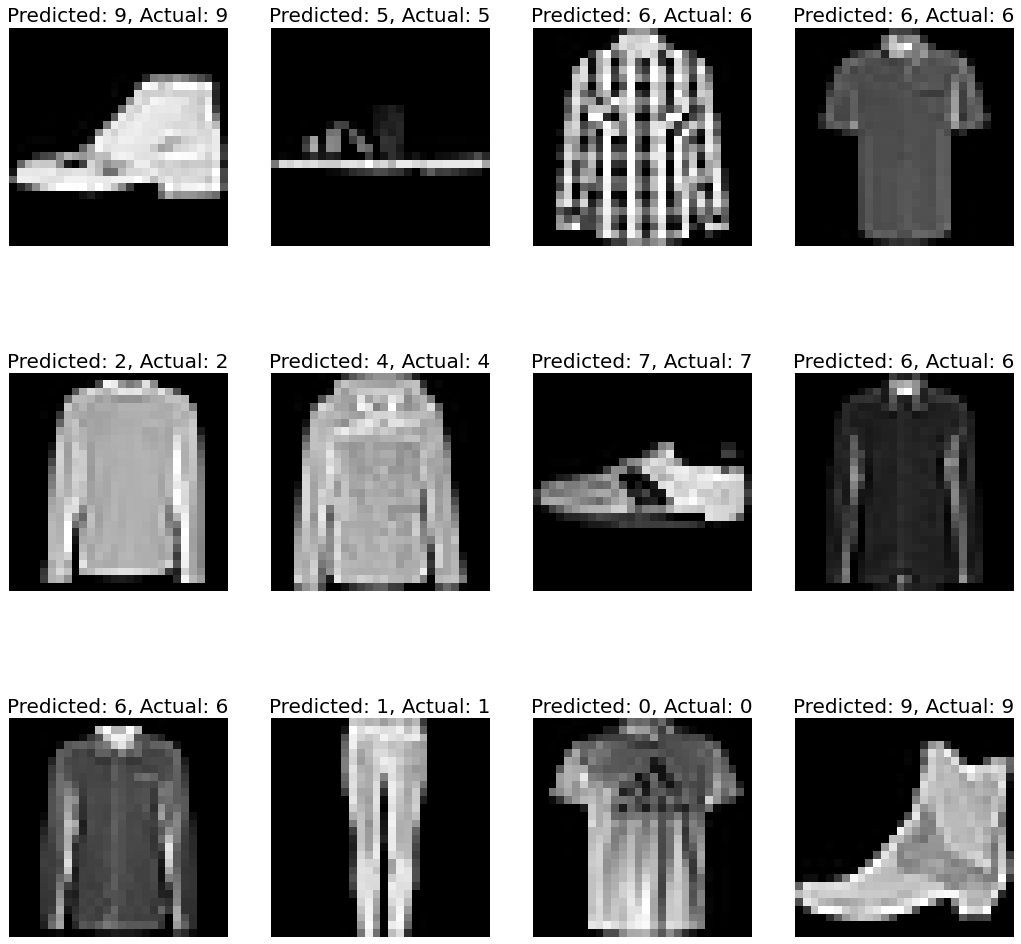

In [ ]:
plt.figure(figsize=(18,18))
for plotIndex, goodIndex in enumerate(classifiedIndexes[0:12]):
  plt.subplot(3, 4, plotIndex + 1)
  plt.axis("off")
  plt.imshow(np.array(X_test.iloc[goodIndex, :]).reshape(28, 28), cmap=plt.cm.gray, interpolation='nearest')
  plt.title('Predicted: {}, Actual: {}'.format(y_pred[goodIndex], np.array(y_test)[goodIndex]), fontsize = 20)

<h2><strong>8. Save trained model and explain how you would use it for new unseen data.</strong></h2>
<p>The differentiation between the labels is very ambiguous, as evident in the misclassified images. A few examples include ambiguity between shirts and pullovers, coats and shirts, sneakers and ankle boots, and several more. A particularly prominent example of this is the first images from the first and second rows. This may be attributed to the low resolution of the images used. It appears that the fine details that separate each clothing item are difficult to categorise in a 28x28 pixel image. When applying this model to unseen data, using higher resolution images would improve the definition of each class and would result in fewer ambiguities. Another alternative to improving the accuracy of the model is to implement fewer classes, potentially combining classes such as “sneaker”, “ankle boot”, and “sandal” into a more general “footwear” class. Although, this may lower the overall complexity of the model. <p>

In [ ]:
# save the model to local storage
filename = 'lg_F_MNIST.sav'
pickle.dump(lr, open(filename, 'wb'))

# load the saved model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)

# print accuracy score
print(result)

0.8492857142857143


<h2><strong>References</strong></h2>
<p>[1] www.kaggle.com. (n.d.). Fashion MNIST. [online] Available at: https://www.kaggle.com/datasets/zalando-research/fashionmnist [Accessed 1 Sep. 2022].
</p>
<p>[2] scipython.com. (n.d.). Logistic regression for image classification. [online] Available at: https://scipython.com/blog/logistic-regression-for-image-classification/ [Accessed 1 Sep. 2022].</p>
